In [5]:
pip install fiftyone

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
INFO: pip is looking at multiple versions of motor to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.5/10.5 MB 68.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.9/108.9 kB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.7/99.7 kB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.7/61.7 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 8.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.7/74.7 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 47.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.2/73.2 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 943.1/943.1 kB 40.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━

In [1]:
!unzip -q "/content/style_images.zip" -d "/content/dataset"


In [3]:
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

transform = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])


dataset_path = "/content/dataset/style_images"


dataset = datasets.ImageFolder(root=dataset_path, transform=transform)


train_loader = DataLoader(dataset, batch_size=16, shuffle=True, num_workers=2)


print("Classes:", dataset.classes)



Classes: ['da_vinci', 'pablo_picasso', 'van_gogh']


In [6]:
import os
import shutil
import fiftyone.zoo as foz
from tqdm import tqdm

#  COCO dataset
dataset = foz.load_zoo_dataset(
    "coco-2017",
    split="train",
    label_types=[],
    classes=["person", "car"],
    max_samples=50
)


output_dir = "/content/coco_content_images"
if not os.path.exists(output_dir):
    os.makedirs(output_dir)


for i, sample in tqdm(enumerate(dataset)):
    img_path = sample.filepath
    img_name = f"image_{i+1}.jpg"
    save_path = os.path.join(output_dir, img_name)
    shutil.copy(img_path, save_path)



INFO:fiftyone.zoo.datasets:Downloading split 'train' to '/root/fiftyone/coco-2017/train' if necessary


INFO:fiftyone.utils.coco:Downloading annotations to '/root/fiftyone/coco-2017/tmp-download/annotations_trainval2017.zip'


 100% |██████|    1.9Gb/1.9Gb [3.0s elapsed, 0s remaining, 606.2Mb/s]      


INFO:eta.core.utils: 100% |██████|    1.9Gb/1.9Gb [3.0s elapsed, 0s remaining, 606.2Mb/s]      


Extracting annotations to '/root/fiftyone/coco-2017/raw/instances_train2017.json'


INFO:fiftyone.utils.coco:Extracting annotations to '/root/fiftyone/coco-2017/raw/instances_train2017.json'


INFO:fiftyone.utils.coco:Downloading 50 images


 100% |████████████████████| 50/50 [4.8s elapsed, 0s remaining, 11.0 images/s]      


INFO:eta.core.utils: 100% |████████████████████| 50/50 [4.8s elapsed, 0s remaining, 11.0 images/s]      


Writing annotations for 50 downloaded samples to '/root/fiftyone/coco-2017/train/labels.json'


INFO:fiftyone.utils.coco:Writing annotations for 50 downloaded samples to '/root/fiftyone/coco-2017/train/labels.json'


Dataset info written to '/root/fiftyone/coco-2017/info.json'


INFO:fiftyone.zoo.datasets:Dataset info written to '/root/fiftyone/coco-2017/info.json'


Loading 'coco-2017' split 'train'


INFO:fiftyone.zoo.datasets:Loading 'coco-2017' split 'train'


 100% |███████████████████| 50/50 [56.9ms elapsed, 0s remaining, 878.6 samples/s]  


INFO:eta.core.utils: 100% |███████████████████| 50/50 [56.9ms elapsed, 0s remaining, 878.6 samples/s]  


Dataset 'coco-2017-train-50' created


INFO:fiftyone.zoo.datasets:Dataset 'coco-2017-train-50' created
50it [00:00, 1209.70it/s]


Style Image Classes: ['da_vinci', 'pablo_picasso', 'van_gogh']


INFO:fiftyone.zoo.datasets:Downloading split 'train' to '/root/fiftyone/coco-2017/train' if necessary


Found annotations at '/root/fiftyone/coco-2017/raw/instances_train2017.json'


INFO:fiftyone.utils.coco:Found annotations at '/root/fiftyone/coco-2017/raw/instances_train2017.json'


Sufficient images already downloaded


INFO:fiftyone.utils.coco:Sufficient images already downloaded


Existing download of split 'train' is sufficient


INFO:fiftyone.zoo.datasets:Existing download of split 'train' is sufficient


Loading existing dataset 'coco-2017-train-50'. To reload from disk, either delete the existing dataset or provide a custom `dataset_name` to use


INFO:fiftyone.zoo.datasets:Loading existing dataset 'coco-2017-train-50'. To reload from disk, either delete the existing dataset or provide a custom `dataset_name` to use


Content Image Classes: ['car', 'person']


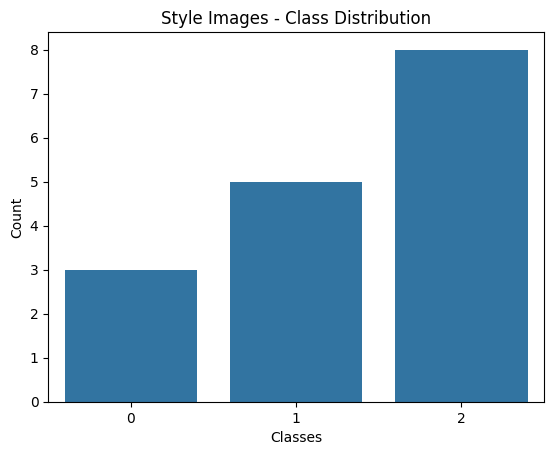

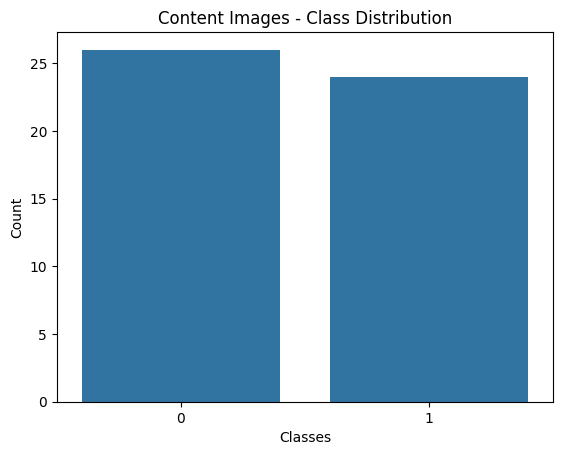

Visualizing Style Samples:


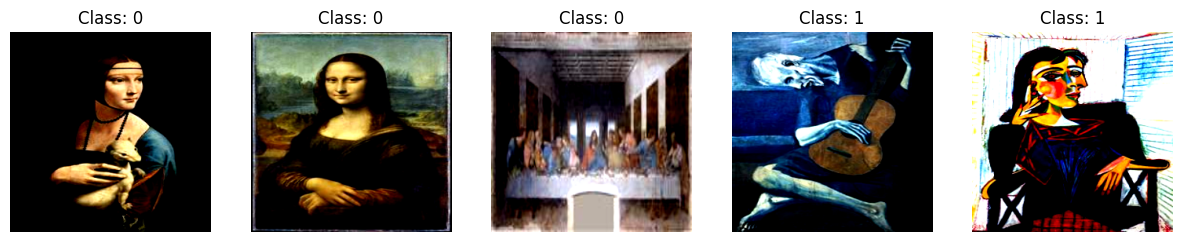

Visualizing Content Samples:


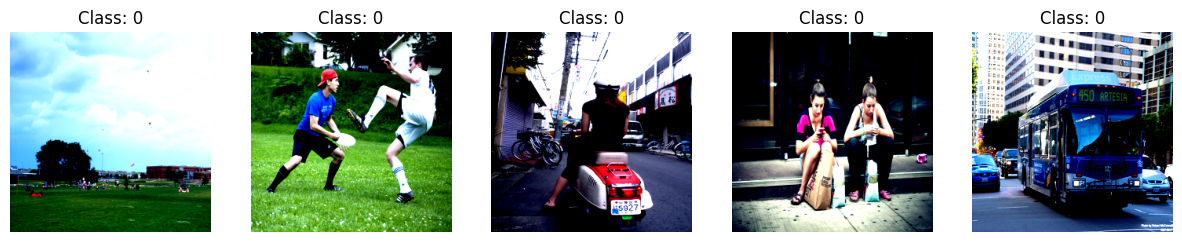

In [7]:
import os
import shutil
import random
import matplotlib.pyplot as plt
import seaborn as sns
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, random_split
import fiftyone.zoo as foz


transform = transforms.Compose([
    transforms.Resize((256, 256)),  # Resize images
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Normalize
])

style_dataset_path = "/content/dataset/style_images"
style_dataset = datasets.ImageFolder(root=style_dataset_path, transform=transform)


print("Style Image Classes:", style_dataset.classes)


train_size = int(0.8 * len(style_dataset))
test_size = len(style_dataset) - train_size
style_train, style_test = random_split(style_dataset, [train_size, test_size])


style_train_loader = DataLoader(style_train, batch_size=16, shuffle=True, num_workers=2)
style_test_loader = DataLoader(style_test, batch_size=16, shuffle=False, num_workers=2)


content_dataset = foz.load_zoo_dataset(
    "coco-2017",
    split="train",
    label_types=[],
    classes=["person", "car"],
    max_samples=50
)

output_dir = "/content/coco_content_images"
if not os.path.exists(output_dir):
    os.makedirs(output_dir)


for i, sample in enumerate(content_dataset):
    img_path = sample.filepath
    img_name = f"image_{i+1}.jpg"
    save_path = os.path.join(output_dir, img_name)
    shutil.copy(img_path, save_path)


class_labels = ["person", "car"]
class_dirs = {label: os.path.join(output_dir, label) for label in class_labels}
for class_dir in class_dirs.values():
    os.makedirs(class_dir, exist_ok=True)

image_files = [f for f in os.listdir(output_dir) if f.endswith('.jpg') or f.endswith('.png')]
for img_file in image_files:
    img_path = os.path.join(output_dir, img_file)
    label = random.choice(class_labels)
    save_path = os.path.join(class_dirs[label], img_file)
    shutil.copy(img_path, save_path)


content_dataset = datasets.ImageFolder(root=output_dir, transform=transform)


print("Content Image Classes:", content_dataset.classes)


def plot_class_distribution(dataset, title):
    labels = [item[1] for item in dataset.samples]
    sns.countplot(x=labels)
    plt.title(f"{title} - Class Distribution")
    plt.xlabel("Classes")
    plt.ylabel("Count")
    plt.show()


plot_class_distribution(style_dataset, "Style Images")
plot_class_distribution(content_dataset, "Content Images")


def visualize_samples(dataset, num_samples=5):
    plt.figure(figsize=(15, 5))
    for i in range(num_samples):
        image, label = dataset[i]
        image = image.permute(1, 2, 0)
        image = (image * 0.5 + 0.5).clamp(0, 1)
        plt.subplot(1, num_samples, i + 1)
        plt.imshow(image)
        plt.title(f"Class: {label}")
        plt.axis("off")
    plt.show()

print("Visualizing Style Samples:")
visualize_samples(style_dataset)

print("Visualizing Content Samples:")
visualize_samples(content_dataset)


In [ ]:

from PIL import Image

# Load the image
image_path = "/content/image-252x200.jpg"
image = Image.open(image_path)

# Get image dimensions
width, height = image.size
print(f"Image size: {width}x{height}")


Image size: 252x200


In [ ]:
from PIL import Image

# Load the image
image_path = "/content/starry night.jpg"
image = Image.open(image_path)

# Get image dimensions
width, height = image.size
print(f"Image size: {width}x{height}")


Image size: 252x200


In [ ]:
from __future__ import print_function
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

from PIL import Image
import matplotlib.pyplot as plt
import torchvision.transforms as transforms
import torchvision.models as models
import copy

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")



In [ ]:
imsize = 512 if torch.cuda.is_available() else 128
loader = transforms.Compose([transforms.Resize(imsize), transforms.ToTensor()])
unloader = transforms.ToPILImage()


In [ ]:
def image_loader(image_name, target_size=None):
    image = Image.open(image_name).convert("RGB")  # Force RGB format
    if target_size:
        image = image.resize(target_size)
    image = loader(image).unsqueeze(0)  # Add batch dimension
    return image.to(device, torch.float)



In [ ]:
style_img = image_loader("/content/starry night.jpg")
content_img = image_loader("/content/image-252x200.jpg")

print(f"Style Image Tensor size: {style_img.size()}")
print(f"Content Image Tensor size: {content_img.size()}")

assert style_img.size() == content_img.size(), "Images must have the same size."


Style Image Tensor size: torch.Size([1, 3, 512, 645])
Content Image Tensor size: torch.Size([1, 3, 512, 645])


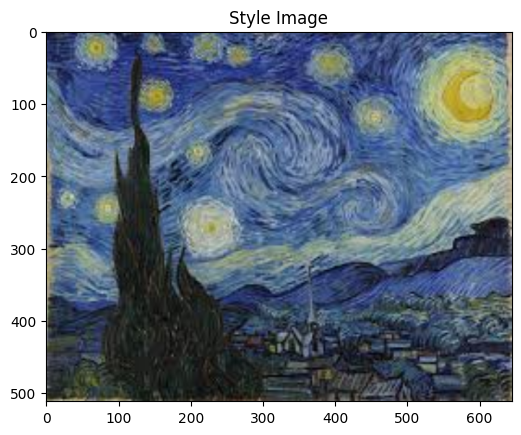

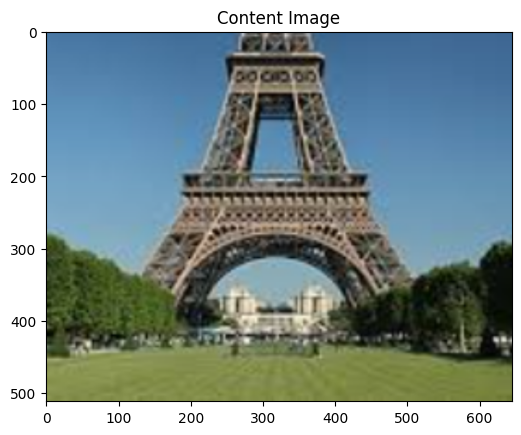

In [ ]:
def imshow(tensor, title=None):
    image = tensor.cpu().clone()
    image = image.squeeze(0)
    image = unloader(image)
    plt.imshow(image)
    if title:
        plt.title(title)
    plt.pause(0.001)

plt.figure()
imshow(style_img, title='Style Image')

plt.figure()
imshow(content_img, title='Content Image')


In [ ]:
class ContentLoss(nn.Module):
    def __init__(self, target):
        super(ContentLoss, self).__init__()
        self.target = target.detach()

    def forward(self, input):
        self.loss = F.mse_loss(input, self.target)
        return input



In [ ]:
def gram_matrix(input):
    a, b, c, d = input.size()
    features = input.view(a * b, c * d)
    G = torch.mm(features, features.t())
    return G.div(a * b * c * d)

class StyleLoss(nn.Module):
    def __init__(self, target_feature):
        super(StyleLoss, self).__init__()
        self.target = gram_matrix(target_feature).detach()

    def forward(self, input):
        G = gram_matrix(input)
        self.loss = F.mse_loss(G, self.target)
        return input



In [ ]:
class Normalization(nn.Module):
    def __init__(self, mean, std):
        super(Normalization, self).__init__()
        self.mean = torch.tensor(mean).view(-1, 1, 1)
        self.std = torch.tensor(std).view(-1, 1, 1)

    def forward(self, img):
        return (img - self.mean) / self.std


In [ ]:
content_layers_default = ['conv_4']
style_layers_default = ['conv_1', 'conv_2', 'conv_3', 'conv_4', 'conv_5']

def get_style_model_and_losses(cnn, normalization_mean, normalization_std, style_img, content_img,
                               content_layers=content_layers_default, style_layers=style_layers_default):
    cnn = copy.deepcopy(cnn)
    normalization = Normalization(normalization_mean, normalization_std).to(device)
    content_losses = []
    style_losses = []
    model = nn.Sequential(normalization)

    i = 0
    for layer in cnn.children():
        if isinstance(layer, nn.Conv2d):
            i += 1
            name = f'conv_{i}'
        elif isinstance(layer, nn.ReLU):
            name = f'relu_{i}'
            layer = nn.ReLU(inplace=False)
        elif isinstance(layer, nn.MaxPool2d):
            name = f'pool_{i}'
        elif isinstance(layer, nn.BatchNorm2d):
            name = f'bn_{i}'
        else:
            raise RuntimeError(f'Unrecognized layer: {layer.__class__.__name__}')

        model.add_module(name, layer)

        if name in content_layers:
            target = model(content_img).detach()
            content_loss = ContentLoss(target)
            model.add_module(f"content_loss_{i}", content_loss)
            content_losses.append(content_loss)

        if name in style_layers:
            target_feature = model(style_img).detach()
            style_loss = StyleLoss(target_feature)
            model.add_module(f"style_loss_{i}", style_loss)
            style_losses.append(style_loss)

    for i in range(len(model) - 1, -1, -1):
        if isinstance(model[i], ContentLoss) or isinstance(model[i], StyleLoss):
            break

    model = model[:(i + 1)]
    return model, style_losses, content_losses


In [ ]:
def get_input_optimizer(input_img):
    return optim.LBFGS([input_img.requires_grad_()])


In [ ]:

def run_style_transfer(cnn, normalization_mean, normalization_std, content_img, style_img, input_img,
                       num_steps=2000, style_weight=100000000, content_weight=0.5):
    """Run the style transfer."""
    print("Building the style transfer model...")
    model, style_losses, content_losses = get_style_model_and_losses(
        cnn, normalization_mean, normalization_std, style_img, content_img
    )
    optimizer = get_input_optimizer(input_img)

    print("Optimizing...")
    run = [0]
    while run[0] <= num_steps:
        def closure():

            input_img.data.clamp_(0, 1)
            optimizer.zero_grad()
            model(input_img)
            style_score = sum(sl.loss for sl in style_losses)
            content_score = sum(cl.loss for cl in content_losses)


            loss = style_weight * style_score + content_weight * content_score
            loss.backward()

            run[0] += 1

            if run[0] % 200 == 0:
                print(f"Iteration {run[0]}:")
                print(f"Style Loss: {style_score.item():.4f} Content Loss: {content_score.item():.4f}")
                print()
                plt.figure()
                imshow(input_img, title=f"Output at Iteration {run[0]}")

            return loss

        optimizer.step(closure)


    input_img.data.clamp_(0, 1)
    return input_img



/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG19_Weights.IMAGENET1K_V1`. You can also use `weights=VGG19_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Building the style transfer model...
Optimizing...


<ipython-input-24-f9c14a6a0341>:4: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.mean = torch.tensor(mean).view(-1, 1, 1)
<ipython-input-24-f9c14a6a0341>:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.std = torch.tensor(std).view(-1, 1, 1)


Iteration 200:
Style Loss: 0.0000 Content Loss: 0.8716



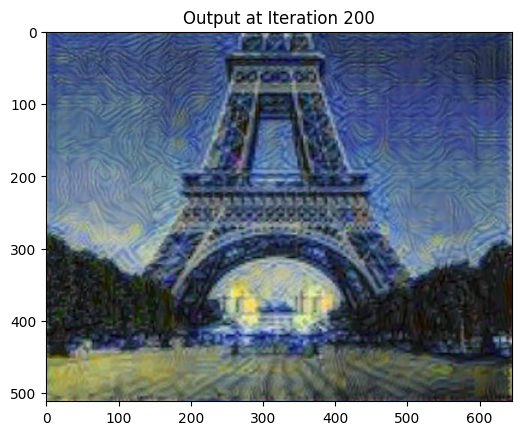

Iteration 400:
Style Loss: 0.0000 Content Loss: 1.2963



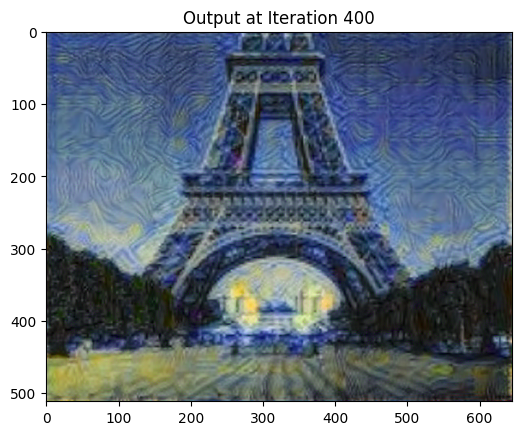

Iteration 600:
Style Loss: 0.0000 Content Loss: 1.4111



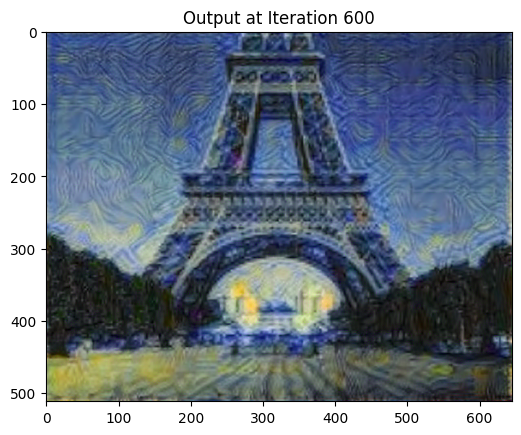

Iteration 800:
Style Loss: 0.0000 Content Loss: 1.4029



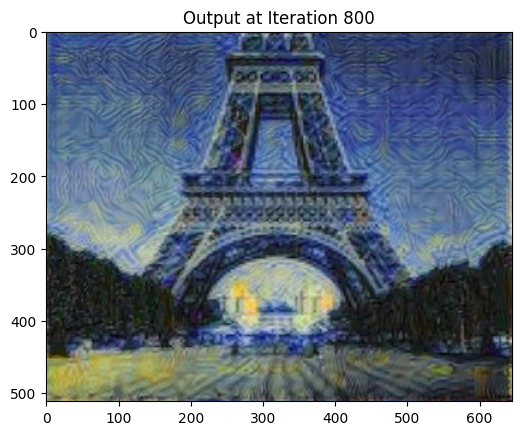

Iteration 1000:
Style Loss: 0.0000 Content Loss: 1.3722



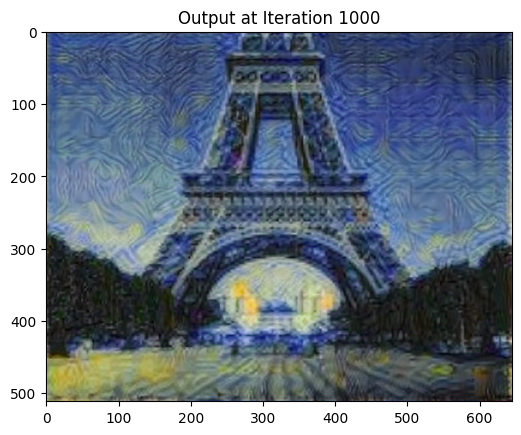

Iteration 1200:
Style Loss: 0.0000 Content Loss: 1.3327



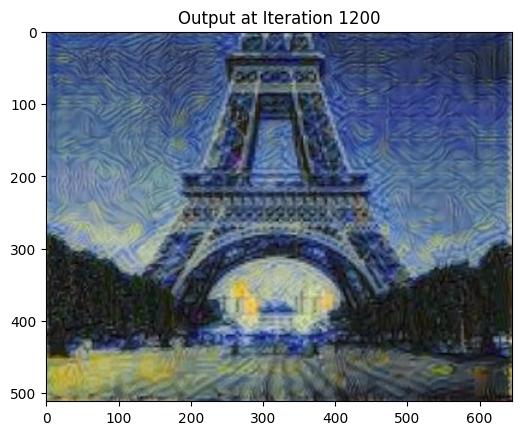

Iteration 1400:
Style Loss: 0.0000 Content Loss: 1.2890



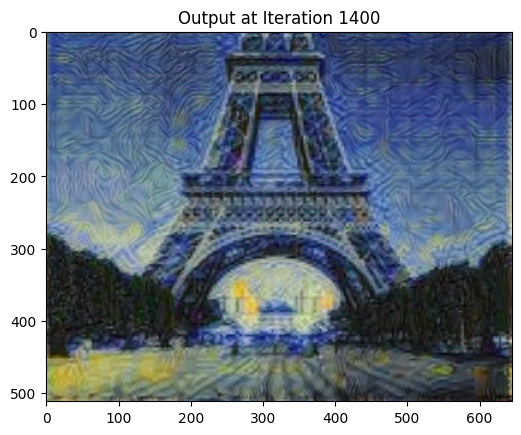

Iteration 1600:
Style Loss: 0.0000 Content Loss: 1.2532



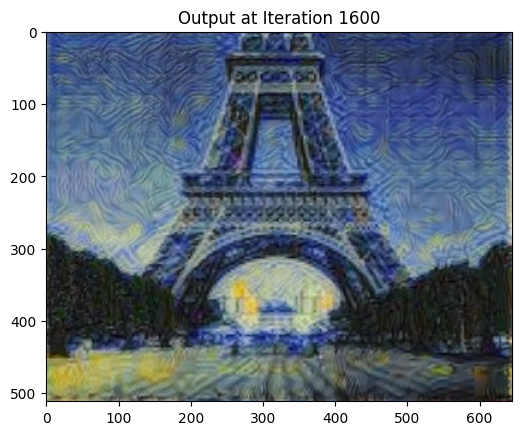

Iteration 1800:
Style Loss: 0.0000 Content Loss: 1.2228



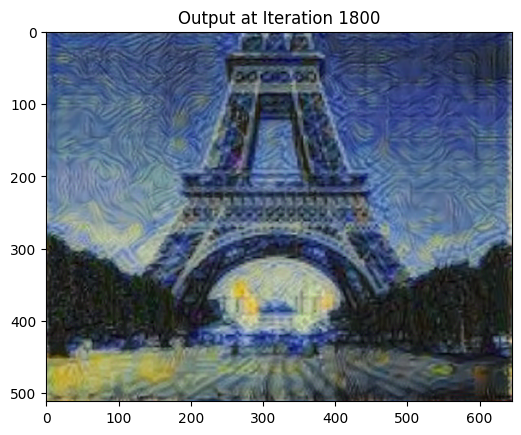

Iteration 2000:
Style Loss: 0.0000 Content Loss: 1.1977



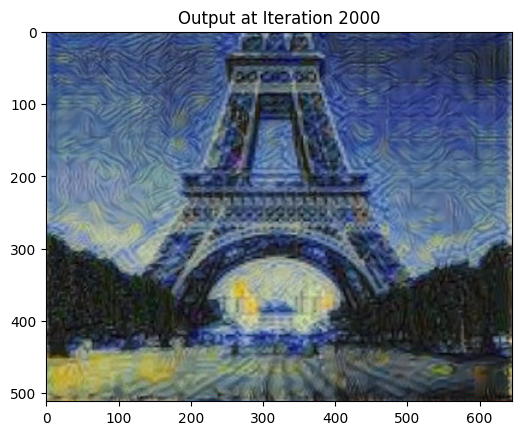

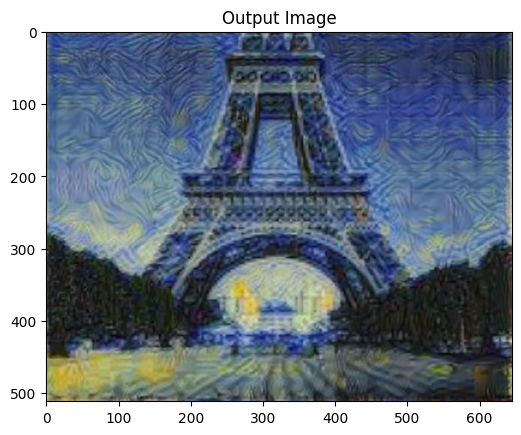

In [ ]:
import torch
import torchvision.models as models


device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


cnn = models.vgg19(pretrained=True).features.to(device).eval()

# Normalization for the VGG network
cnn_normalization_mean = torch.tensor([0.485, 0.456, 0.406]).to(device)
cnn_normalization_std = torch.tensor([0.229, 0.224, 0.225]).to(device)

# Calling the style transfer function
output = run_style_transfer(cnn, cnn_normalization_mean, cnn_normalization_std,
                            content_img, style_img, content_img, num_steps=2000)


plt.figure()
imshow(output, title='Output Image')
plt.show()
